# Import Library & Data

In [1]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
import os 
os.chdir(r"C:\Users\akash\Downloads\DATA SCIENCE PROJECTS\IPL\Final\Dataset") 

In [3]:
# importing or loading the dataset 
Data_for_PCA = pd.read_csv(r"all_rounders.csv")

Data_for_PCA.head()

,Name,Runs,Highest,Average,Batting_strike_rate,100,50,4,6,Wickets,Economy,B_Average,Bowling_strike_rate
0,Mitchell Santner,32,22,32.00,139.13,0,0,0,3,6,7.00,24.50,21.00
1,Rahul Tewatia,366,53,30.50,134.56,0,1,24,20,24,7.13,28.33,23.83
2,Hardik Pandya,1349,91,29.98,159.27,0,4,86,93,42,9.07,31.26,20.69
3,Kieron Pollard,3023,83,29.93,149.88,0,15,196,198,60,8.88,32.67,22.08
4,Andre Russell,1517,88,29.75,182.33,0,8,105,129,61,8.96,28.08,18.80


# Data Pre-Processing

### Checking missing values

In [4]:
Data_for_PCA.isna().sum()

Name                   0
Runs                   0
Highest                0
Average                0
Batting_strike_rate    0
100                    0
50                     0
4                      0
6                      0
Wickets                0
Economy                0
B_Average              0
Bowling_strike_rate    0
dtype: int64

<AxesSubplot:xlabel='Runs', ylabel='Batting_strike_rate'>

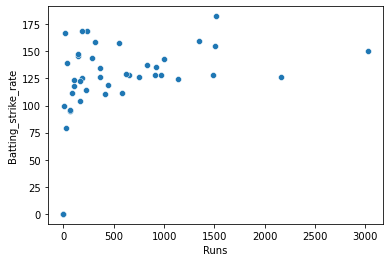

In [5]:
sns.scatterplot(data=Data_for_PCA, x= "Runs", y="Batting_strike_rate")

# Exploratory Data Analysis

<AxesSubplot:xlabel='Runs', ylabel='Count'>

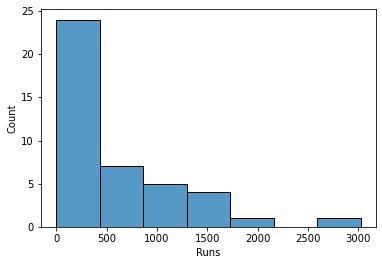

In [6]:
sns.histplot(data = Data_for_PCA, x = "Runs")

<AxesSubplot:xlabel='Highest', ylabel='Count'>

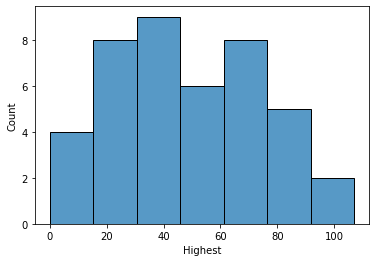

In [7]:
sns.histplot(data = Data_for_PCA, x = "Highest")

<AxesSubplot:xlabel='Average', ylabel='Count'>

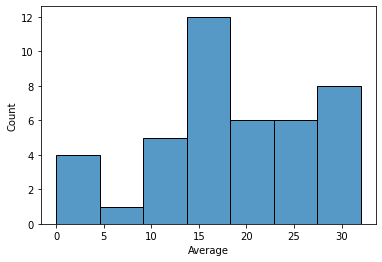

In [8]:
sns.histplot(data = Data_for_PCA, x = "Average")

<AxesSubplot:xlabel='Batting_strike_rate', ylabel='Count'>

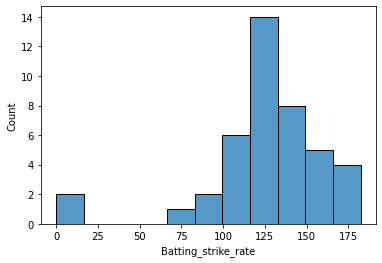

In [9]:
sns.histplot(data = Data_for_PCA, x = "Batting_strike_rate")

In [10]:
Data_for_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 42 non-null     object 
 1   Runs                 42 non-null     int64  
 2   Highest              42 non-null     int64  
 3   Average              42 non-null     float64
 4   Batting_strike_rate  42 non-null     float64
 5   100                  42 non-null     int64  
 6   50                   42 non-null     int64  
 7   4                    42 non-null     int64  
 8   6                    42 non-null     int64  
 9   Wickets              42 non-null     int64  
 10  Economy              42 non-null     float64
 11  B_Average            42 non-null     float64
 12  Bowling_strike_rate  42 non-null     float64
dtypes: float64(5), int64(7), object(1)
memory usage: 4.4+ KB


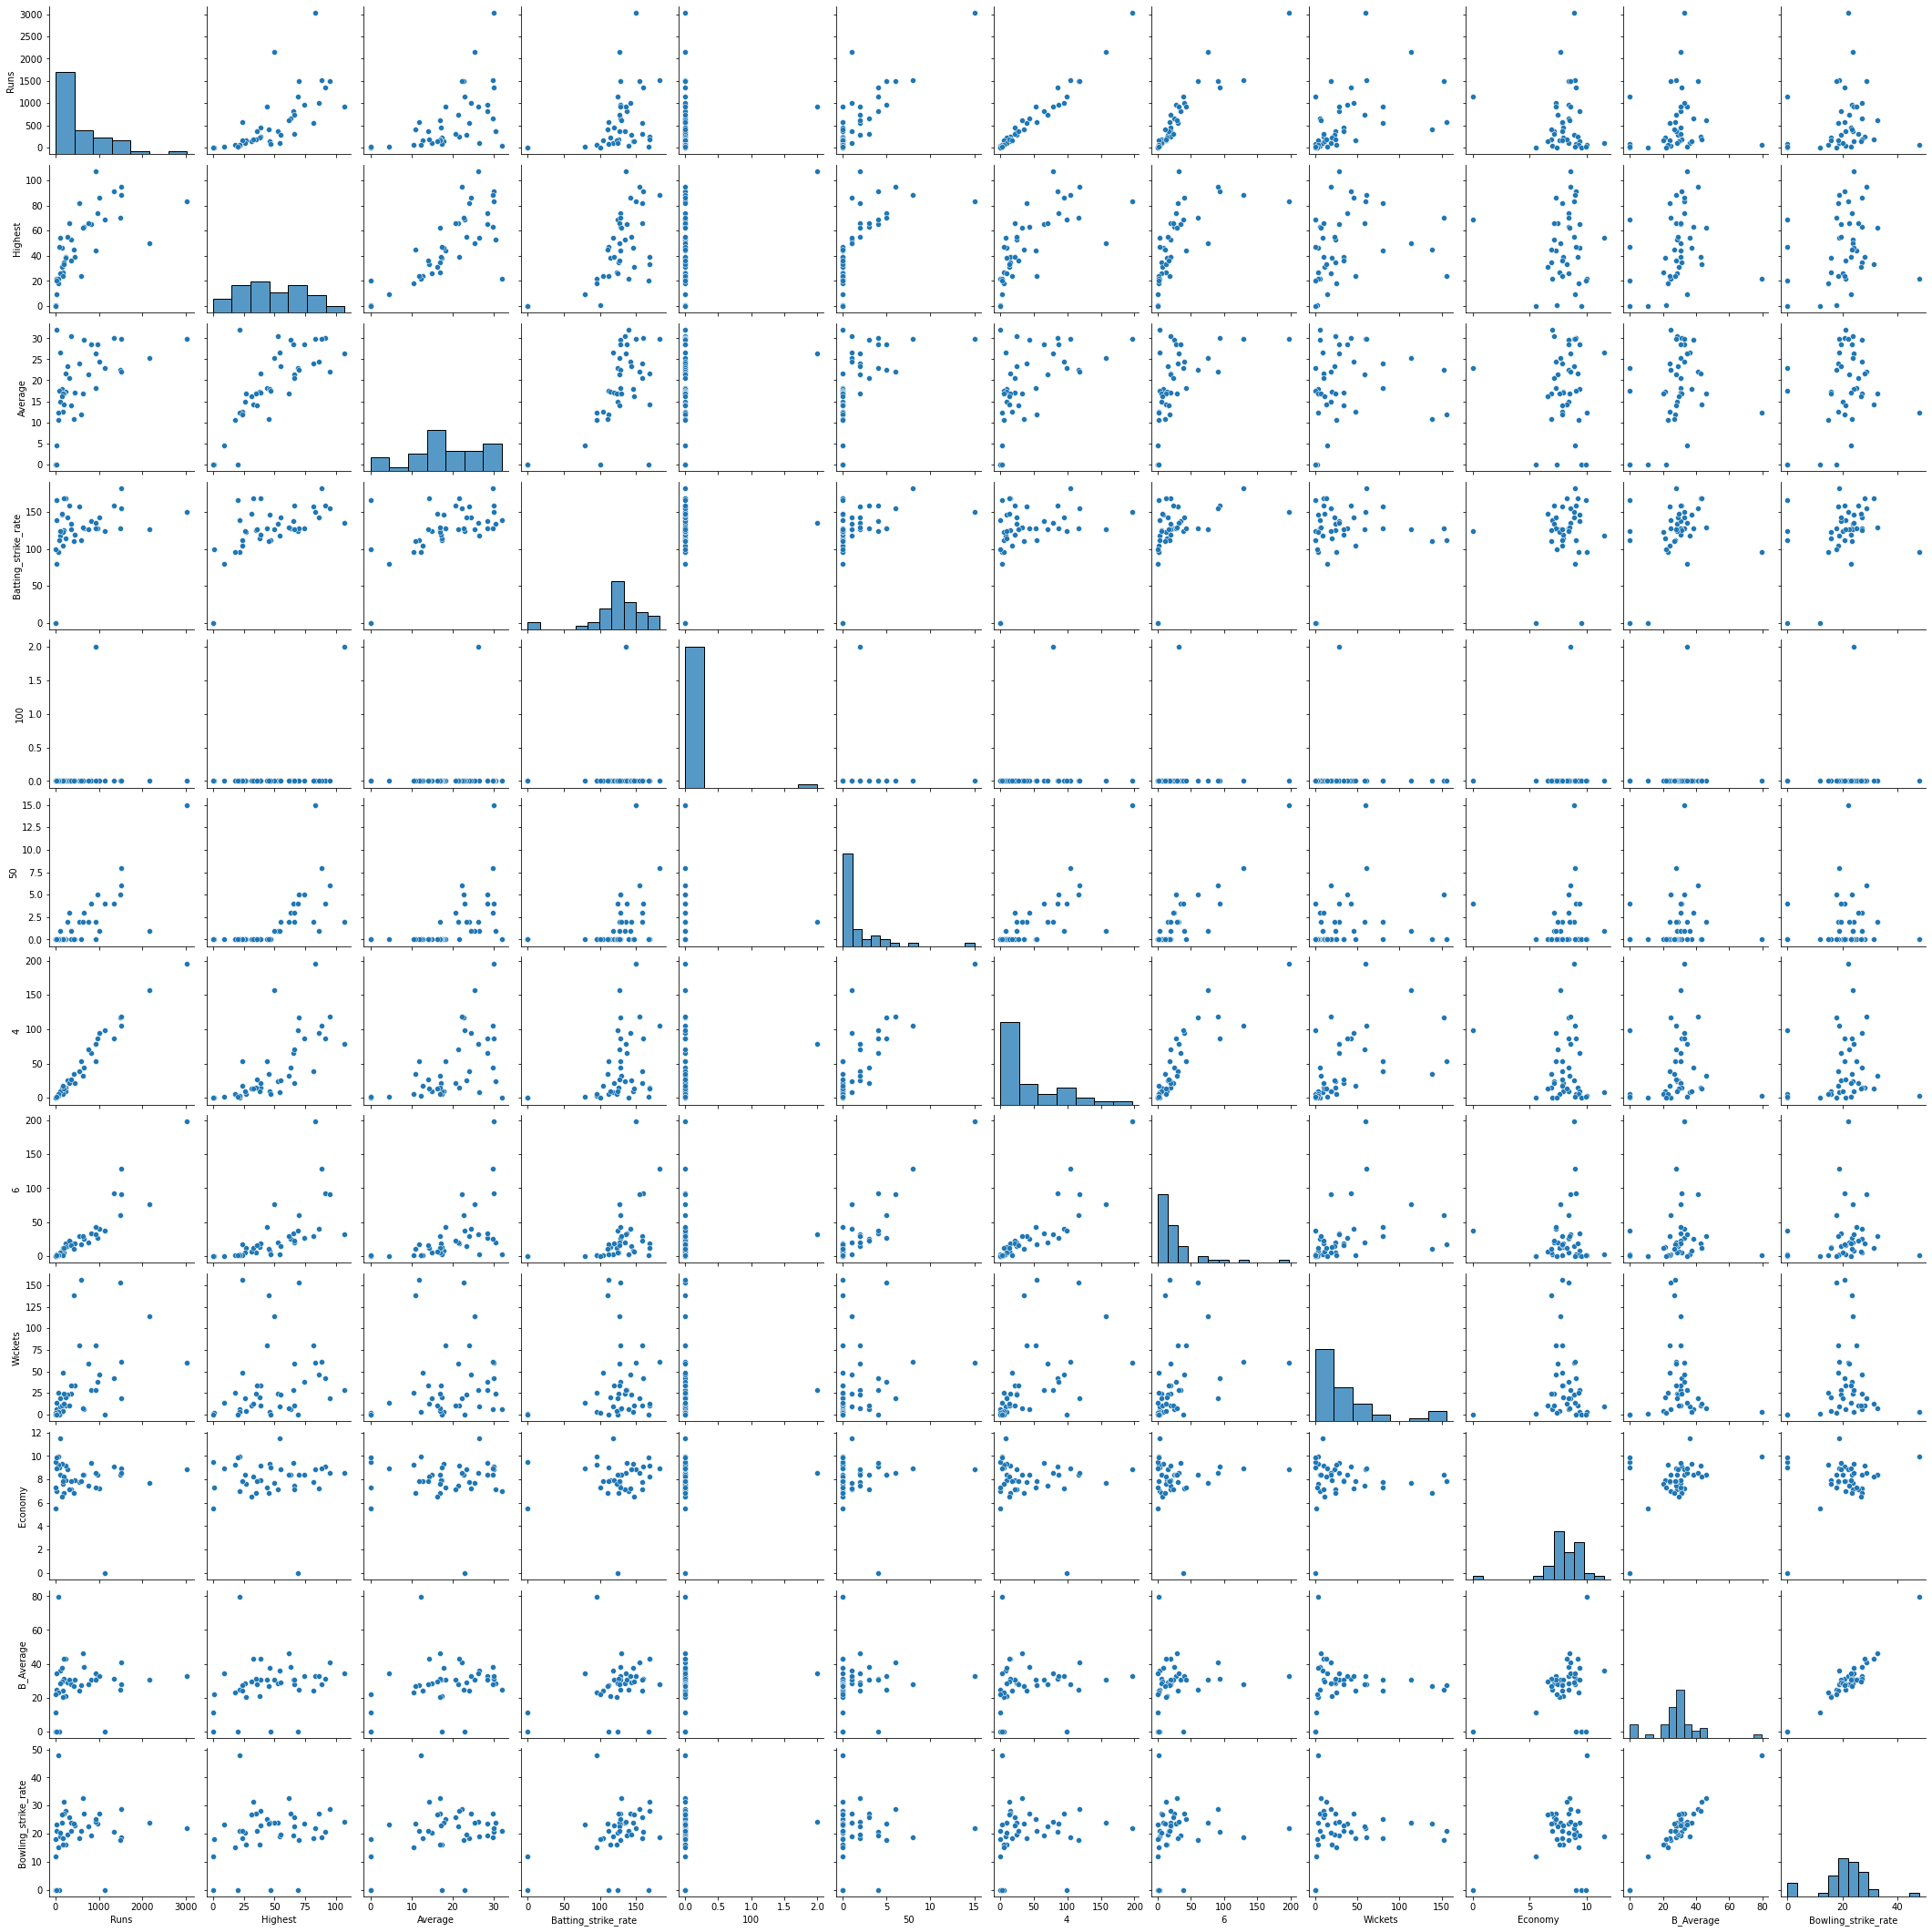

In [11]:
sns.pairplot(data=Data_for_PCA)

In [12]:
Data_for_PCA.describe() 

,Runs,Highest,Average,Batting_strike_rate,100,50,4,6,Wickets,Economy,B_Average,Bowling_strike_rate
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.00000,42.000000
mean,573.904762,47.738095,18.587857,125.437619,0.047619,1.690476,42.428571,28.238095,34.571429,8.049524,28.44119,20.806429
std,649.893155,27.321089,8.893143,35.908788,0.308607,2.900699,47.123161,39.081409,41.039031,1.675008,13.72483,8.985328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,115.250000,26.250000,14.107500,115.102500,0.000000,0.000000,8.250000,3.500000,6.250000,7.362500,24.29750,18.452500
50%,337.000000,45.500000,18.070000,127.710000,0.000000,0.000000,23.000000,17.000000,21.500000,8.325000,29.13500,21.570000
75%,891.000000,66.000000,25.147500,145.282500,0.000000,2.000000,68.750000,31.500000,45.000000,8.952500,32.77000,24.975000
max,3023.000000,107.000000,32.000000,182.330000,2.000000,15.000000,196.000000,198.000000,156.000000,11.510000,79.67000,48.000000


## Taking specific column for Analysis

In [13]:
numeric_predictors=['Runs','Highest','Average','Batting_strike_rate','100','50', '4','6','Wickets','Economy','B_Average','Bowling_strike_rate']
X_train = Data_for_PCA[numeric_predictors]
y_train = Data_for_PCA['Name']

In [14]:
X_train.head()

,Runs,Highest,Average,Batting_strike_rate,100,50,4,6,Wickets,Economy,B_Average,Bowling_strike_rate
0,32,22,32.00,139.13,0,0,0,3,6,7.00,24.50,21.00
1,366,53,30.50,134.56,0,1,24,20,24,7.13,28.33,23.83
2,1349,91,29.98,159.27,0,4,86,93,42,9.07,31.26,20.69
3,3023,83,29.93,149.88,0,15,196,198,60,8.88,32.67,22.08
4,1517,88,29.75,182.33,0,8,105,129,61,8.96,28.08,18.80


In [15]:
Correlation=X_train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,Runs,Highest,Average,Batting_strike_rate,100,50,4,6,Wickets,Economy,B_Average,Bowling_strike_rate
Runs,1.000000,0.686107,0.559952,0.347294,0.084177,0.829137,0.982848,0.929581,0.479640,-0.079850,0.105952,0.102034
Highest,0.686107,1.000000,0.778323,0.604388,0.342861,0.653563,0.714222,0.642877,0.240465,-0.006025,0.203657,0.188256
Average,0.559952,0.778323,1.000000,0.612677,0.136898,0.531284,0.558517,0.524778,0.156974,0.004132,0.280806,0.272526
Batting_strike_rate,0.347294,0.604388,0.612677,1.000000,0.042533,0.341494,0.337192,0.399008,0.111949,0.093776,0.289383,0.301775
100,0.084177,0.342861,0.136898,0.042533,1.000000,0.016867,0.122673,0.015215,-0.025311,0.045341,0.068166,0.059347
50,0.829137,0.653563,0.531284,0.341494,0.016867,1.000000,0.796634,0.898921,0.187970,0.025771,0.081852,0.028713
4,0.982848,0.714222,0.558517,0.337192,0.122673,0.796634,1.000000,0.873131,0.510228,-0.131516,0.083513,0.084543
6,0.929581,0.642877,0.524778,0.399008,0.015215,0.898921,0.873131,1.000000,0.337604,0.037432,0.121903,0.098881
Wickets,0.479640,0.240465,0.156974,0.111949,-0.025311,0.187970,0.510228,0.337604,1.000000,-0.031582,0.029343,0.098082
Economy,-0.079850,-0.006025,0.004132,0.093776,0.045341,0.025771,-0.131516,0.037432,-0.031582,1.000000,0.362549,0.215906


<AxesSubplot:>

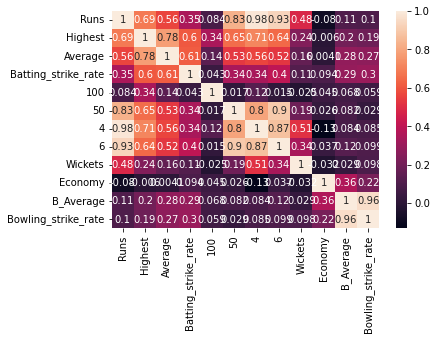

In [16]:
sns.heatmap(X_train.corr(), annot=True)

### PCA is effected by scale so you need to scale the features in the data before applying PCA. 

* You can transform the data onto unit scale (mean = 0 and variance = 1)

In [17]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() # mean 0 & std=1
  
X_train_1 = sc.fit_transform(X_train)  # Fit to data, then transform it.

### Mean

In [18]:
X_train_1.mean(axis=0)

array([-5.02243749e-17, -9.51619735e-17,  6.34413157e-17, -1.37456184e-16,
       -1.98254112e-17,  5.28677631e-18, -6.60847038e-17, -1.32169408e-17,
        6.34413157e-17,  5.60398289e-16, -4.22942105e-16, -5.07530526e-16])

### Standard Deviation

In [19]:
X_train_1.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
X_train.head(3)

,Runs,Highest,Average,Batting_strike_rate,100,50,4,6,Wickets,Economy,B_Average,Bowling_strike_rate
0,32,22,32.00,139.13,0,0,0,3,6,7.00,24.50,21.00
1,366,53,30.50,134.56,0,1,24,20,24,7.13,28.33,23.83
2,1349,91,29.98,159.27,0,4,86,93,42,9.07,31.26,20.69


In [21]:
X_train_1

array([[-8.43944178e-01, -9.53478945e-01,  1.52642554e+00,
         3.85932134e-01, -1.56173762e-01, -5.89846684e-01,
        -9.11290217e-01, -6.53610581e-01, -7.04640452e-01,
        -6.34173369e-01, -2.90638525e-01,  2.18041950e-02],
       [-3.23783856e-01,  1.94929553e-01,  1.35571171e+00,
         2.57122553e-01, -1.56173762e-01, -2.40923294e-01,
        -3.95812923e-01, -2.13348359e-01, -2.60716967e-01,
        -5.55621042e-01, -8.19961283e-03,  3.40579917e-01],
       [ 1.20710715e+00,  1.60265610e+00,  1.29653091e+00,
         9.53596239e-01, -1.56173762e-01,  8.05846879e-01,
         9.35836755e-01,  1.67718942e+00,  1.83206517e-01,
         6.16621384e-01,  2.07869842e-01, -1.31147003e-02],
       [ 3.81413823e+00,  1.30629262e+00,  1.29084045e+00,
         6.88930601e-01, -1.56173762e-01,  4.64400418e+00,
         3.29844102e+00,  4.39645608e+00,  6.27130002e-01,
         5.01814136e-01,  3.11848658e-01,  1.43457121e-01],
       [ 1.46874468e+00,  1.49151979e+00,  1.2703547

# No. of variable in original dataset

In [22]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
model = PCA(n_components = 3) # we are specifying we want 2 PCA
  
principalComponents= model.fit(X_train_1) # Fit the model with X and apply the dimensionality reduction on X.

# Explained Variance
* The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

* This is important as while you can convert high dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, 

In [23]:
import numpy as np
list(np.round(principalComponents.explained_variance_,4))   # eigen values  >= 1 

[5.366, 2.2527, 1.2193]

In [24]:
5.366/12

0.44716666666666666

In [25]:
2.253/12

0.18775

In [26]:
1.2193/12

0.10160833333333334

In [27]:
list(np.round(principalComponents.explained_variance_ratio_,2))    # >= 50%

[0.44, 0.18, 0.1]

* You can see that the first principal component contains 44% of the variance 
* You can see that the second principal component contains 18% of the variance
* You can see that the second principal component contains 10% of the variance

In [28]:
principalComponents.mean_

array([-5.02243749e-17, -9.51619735e-17,  6.34413157e-17, -1.37456184e-16,
       -1.98254112e-17,  5.28677631e-18, -6.60847038e-17, -1.32169408e-17,
        6.34413157e-17,  5.60398289e-16, -4.22942105e-16, -5.07530526e-16])

In [29]:
principalComponents.get_covariance()

array([[ 1.27202948e+00,  6.99400307e-01,  5.94028228e-01,
         4.17059740e-01,  3.37105345e-02,  7.97870554e-01,
         8.78632821e-01,  8.53616944e-01,  4.66185431e-01,
        -7.07401995e-02,  9.01539857e-02,  8.88892231e-02],
       [ 6.99400307e-01,  1.18124661e+00,  7.08534389e-01,
         5.64495695e-01,  3.06052784e-01,  6.63584440e-01,
         6.99987430e-01,  6.80320751e-01,  2.10110252e-01,
        -7.18514027e-04,  2.16692616e-01,  2.02888290e-01],
       [ 5.94028228e-01,  7.08534389e-01,  1.02967453e+00,
         5.33921779e-01,  2.76760923e-01,  5.63848741e-01,
         5.91653208e-01,  5.82850854e-01,  1.74071842e-01,
         5.90037464e-02,  2.99826746e-01,  2.84169750e-01],
       [ 4.17059740e-01,  5.64495695e-01,  5.33921779e-01,
         8.50211615e-01,  2.49543828e-01,  4.00748576e-01,
         4.13250062e-01,  4.15874982e-01,  9.68305752e-02,
         1.15006327e-01,  3.58492260e-01,  3.41446963e-01],
       [ 3.37105345e-02,  3.06052784e-01,  2.7676092

In [30]:
X_train_1 ### scaled dataset

array([[-8.43944178e-01, -9.53478945e-01,  1.52642554e+00,
         3.85932134e-01, -1.56173762e-01, -5.89846684e-01,
        -9.11290217e-01, -6.53610581e-01, -7.04640452e-01,
        -6.34173369e-01, -2.90638525e-01,  2.18041950e-02],
       [-3.23783856e-01,  1.94929553e-01,  1.35571171e+00,
         2.57122553e-01, -1.56173762e-01, -2.40923294e-01,
        -3.95812923e-01, -2.13348359e-01, -2.60716967e-01,
        -5.55621042e-01, -8.19961283e-03,  3.40579917e-01],
       [ 1.20710715e+00,  1.60265610e+00,  1.29653091e+00,
         9.53596239e-01, -1.56173762e-01,  8.05846879e-01,
         9.35836755e-01,  1.67718942e+00,  1.83206517e-01,
         6.16621384e-01,  2.07869842e-01, -1.31147003e-02],
       [ 3.81413823e+00,  1.30629262e+00,  1.29084045e+00,
         6.88930601e-01, -1.56173762e-01,  4.64400418e+00,
         3.29844102e+00,  4.39645608e+00,  6.27130002e-01,
         5.01814136e-01,  3.11848658e-01,  1.43457121e-01],
       [ 1.46874468e+00,  1.49151979e+00,  1.2703547

# Beta Values or Eigen Vector 
Z1 = Beta1*x1+Beta2*X2 + beta3*X3 + ..... + beta13*X13

In [31]:
principalComponents.components_   ##  BETA VALUES  Z1 , Z2 

array([[ 0.40498322,  0.37442305,  0.33198688,  0.2558993 ,  0.06872843,
         0.36957617,  0.4004517 ,  0.39310532,  0.18519564,  0.00713723,
         0.12384089,  0.1191965 ],
       [-0.16270229,  0.03414918,  0.12296618,  0.21218145,  0.07659921,
        -0.14593368, -0.17680606, -0.12931811, -0.10439589,  0.33499631,
         0.60774984,  0.58701926],
       [-0.16069838,  0.34031215,  0.2862503 ,  0.2588313 ,  0.6083291 ,
        -0.05812189, -0.12573492, -0.15736624, -0.45266743, -0.1245546 ,
        -0.18681064, -0.20023757]])

### Renaming the Columns  

* Prediction for data to get data reduction 

In [32]:
X_train_1  # scaled data

array([[-8.43944178e-01, -9.53478945e-01,  1.52642554e+00,
         3.85932134e-01, -1.56173762e-01, -5.89846684e-01,
        -9.11290217e-01, -6.53610581e-01, -7.04640452e-01,
        -6.34173369e-01, -2.90638525e-01,  2.18041950e-02],
       [-3.23783856e-01,  1.94929553e-01,  1.35571171e+00,
         2.57122553e-01, -1.56173762e-01, -2.40923294e-01,
        -3.95812923e-01, -2.13348359e-01, -2.60716967e-01,
        -5.55621042e-01, -8.19961283e-03,  3.40579917e-01],
       [ 1.20710715e+00,  1.60265610e+00,  1.29653091e+00,
         9.53596239e-01, -1.56173762e-01,  8.05846879e-01,
         9.35836755e-01,  1.67718942e+00,  1.83206517e-01,
         6.16621384e-01,  2.07869842e-01, -1.31147003e-02],
       [ 3.81413823e+00,  1.30629262e+00,  1.29084045e+00,
         6.88930601e-01, -1.56173762e-01,  4.64400418e+00,
         3.29844102e+00,  4.39645608e+00,  6.27130002e-01,
         5.01814136e-01,  3.11848658e-01,  1.43457121e-01],
       [ 1.46874468e+00,  1.49151979e+00,  1.2703547

In [33]:
transformed_data=principalComponents.fit_transform(X_train_1)  ### only give data which is transformed ( principal component)
transformed_data

array([[-1.11228361e+00,  3.91378318e-01,  9.52571623e-01],
       [ 1.02920896e-01,  4.37398795e-01,  6.95890010e-01],
       [ 3.14705268e+00,  1.42537706e-02,  2.49992460e-01],
       [ 7.56876578e+00, -1.73608322e+00, -1.52543138e+00],
       [ 4.44665755e+00, -6.32492450e-01, -6.56787166e-02],
       [ 8.83847237e-01,  1.10226546e+00,  4.52240346e-01],
       [ 1.88595343e+00,  1.68146259e-01,  1.15540031e-01],
       [ 1.37146169e+00,  2.18760310e-01,  3.12309236e-01],
       [-6.73932743e-01,  1.41809615e+00,  4.73868364e-01],
       [ 2.30523691e+00,  1.07860071e+00,  4.63631660e+00],
       [ 3.08800037e+00, -8.62437669e-01, -1.67642205e+00],
       [ 1.78608343e+00,  3.28949106e-01,  1.47989392e-01],
       [ 1.04929201e+00, -2.24329194e-01,  3.75951059e-01],
       [-8.83115068e-02,  4.84281604e-01,  5.38951378e-01],
       [ 9.44604623e-01, -4.63312968e+00,  1.77315112e+00],
       [ 2.91646781e+00, -1.30310436e+00, -1.52496162e+00],
       [ 3.57428388e+00,  5.54877491e-01

In [34]:
print("original shape:   ", X_train_1.shape)
print("transformed shape:", transformed_data.shape)

original shape:    (42, 12)
transformed shape: (42, 3)


In [35]:
principalDf = pd.DataFrame(data = transformed_data
             , columns = ['Data PC1', 'Data PC2','Data PC3'])
principalDf.head()

,Data PC1,Data PC2,Data PC3
0,-1.112284,0.391378,0.952572
1,0.102921,0.437399,0.695890
2,3.147053,0.014254,0.249992
3,7.568766,-1.736083,-1.525431
4,4.446658,-0.632492,-0.065679


# To check the Principal Component is uncorrelated / independent

In [36]:
Correlation=round(principalDf.corr(),3)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,Data PC1,Data PC2,Data PC3
Data PC1,1.000000,-0.000000,-0.000000
Data PC2,-0.000000,1.000000,-0.000000
Data PC3,-0.000000,-0.000000,1.000000


## Identify variable is combining together in Which PCA 

In [37]:
numeric_predictors_1=['Runs','Highest','Average','Batting_strike_rate','100','50', '4','6','Wickets','Economy','B_Average','Bowling_strike_rate']
scaled_train=pd.DataFrame(X_train_1,columns=numeric_predictors_1)
scaled_train.head()

,Runs,Highest,Average,Batting_strike_rate,100,50,4,6,Wickets,Economy,B_Average,Bowling_strike_rate
0,-0.843944,-0.953479,1.526426,0.385932,-0.156174,-0.589847,-0.911290,-0.653611,-0.704640,-0.634173,-0.290639,0.021804
1,-0.323784,0.194930,1.355712,0.257123,-0.156174,-0.240923,-0.395813,-0.213348,-0.260717,-0.555621,-0.008200,0.340580
2,1.207107,1.602656,1.296531,0.953596,-0.156174,0.805847,0.935837,1.677189,0.183207,0.616621,0.207870,-0.013115
3,3.814138,1.306293,1.290840,0.688931,-0.156174,4.644004,3.298441,4.396456,0.627130,0.501814,0.311849,0.143457
4,1.468745,1.491520,1.270355,1.603563,-0.156174,2.201540,1.343923,2.609509,0.651792,0.550154,-0.026636,-0.226007


In [38]:
final_data=pd.concat([scaled_train,principalDf],axis=1)
final_data.head()

,Runs,Highest,Average,Batting_strike_rate,100,50,4,6,Wickets,Economy,B_Average,Bowling_strike_rate,Data PC1,Data PC2,Data PC3
0,-0.843944,-0.953479,1.526426,0.385932,-0.156174,-0.589847,-0.911290,-0.653611,-0.704640,-0.634173,-0.290639,0.021804,-1.112284,0.391378,0.952572
1,-0.323784,0.194930,1.355712,0.257123,-0.156174,-0.240923,-0.395813,-0.213348,-0.260717,-0.555621,-0.008200,0.340580,0.102921,0.437399,0.695890
2,1.207107,1.602656,1.296531,0.953596,-0.156174,0.805847,0.935837,1.677189,0.183207,0.616621,0.207870,-0.013115,3.147053,0.014254,0.249992
3,3.814138,1.306293,1.290840,0.688931,-0.156174,4.644004,3.298441,4.396456,0.627130,0.501814,0.311849,0.143457,7.568766,-1.736083,-1.525431
4,1.468745,1.491520,1.270355,1.603563,-0.156174,2.201540,1.343923,2.609509,0.651792,0.550154,-0.026636,-0.226007,4.446658,-0.632492,-0.065679


In [39]:
Correlation_Matrix=pd.DataFrame(round(final_data.corr(),3))*100
Correlation_Matrix=abs(Correlation_Matrix.iloc[0:12,12:15])
Correlation_Matrix.style.applymap(lambda x: 'background-color : yellow' if x > 50 else '')

,Data PC1,Data PC2,Data PC3
Runs,92.700000,24.100000,17.500000
Highest,85.700000,5.100000,37.100000
Average,76.000000,18.200000,31.200000
Batting_strike_rate,58.600000,31.500000,28.200000
100,15.700000,11.400000,66.400000
50,84.600000,21.600000,6.300000
4,91.700000,26.200000,13.700000
6,90.000000,19.200000,17.200000
Wickets,42.400000,15.500000,49.400000
Economy,1.600000,49.700000,13.600000


In [40]:
a=final_data["Data PC1"]

In [41]:
b=final_data["Data PC2"]

In [42]:
x=final_data["Data PC3"]

In [43]:
c=a+b+x

In [44]:
c.head()

0    0.231666
1    1.236210
2    3.411299
3    4.307251
4    3.748486
dtype: float64

In [45]:
d=pd.DataFrame(y_train)


In [46]:
all_rounders_ranking_final=pd.concat([c,d],axis=1)

In [47]:
all_rounders_ranking_final.head()

,0,Name
0,0.231666,Mitchell Santner
1,1.236210,Rahul Tewatia
2,3.411299,Hardik Pandya
3,4.307251,Kieron Pollard
4,3.748486,Andre Russell


In [48]:
all_rounders_ranking_final1= all_rounders_ranking_final.sort_values([0],ascending=False,ignore_index= True)

In [49]:
all_rounders_ranking_final1.head()

,0,Name
0,8.020154,Ben Stokes
1,4.307251,Kieron Pollard
2,3.960454,Glenn Maxwell
3,3.748486,Andre Russell
4,3.411299,Hardik Pandya


In [51]:
all_rounders_ranking_final1.to_csv("ranking_all_rounder_ipl.csv",index=False)